# Homework 01: Multivariate Parametric Classification
# esafter17 63911

In [2]:
#import necessesary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# mean parameters
class_means = np.array([[+0.0,+2.5],
                        [-2.5,-2.0],
                        [+2.5,-2.0]])
# covariance parameters
class_covariances = np.array([[[+3.2,+0.0],[+0.0,+1.2]],
                             [[+1.2,-0.8],[-0.8,+1.2]],
                             [[+1.2,+0.8],[+0.8,+1.2]]])
# sample sizes
class_sizes = np.array([120, 90, 90])

In [4]:
# generate random samples
points1 = np.random.multivariate_normal(class_means[0,:], class_covariances[0,:,:], class_sizes[0])
points2 = np.random.multivariate_normal(class_means[1,:], class_covariances[1,:,:], class_sizes[1])
points3 = np.random.multivariate_normal(class_means[2,:], class_covariances[2,:,:], class_sizes[2])
X = np.vstack((points1, points2, points3))

# generate corresponding labels
y = np.concatenate((np.repeat(1, class_sizes[0]), np.repeat(2, class_sizes[1]), np.repeat(3, class_sizes[2])))
y_truth = y.astype(int)



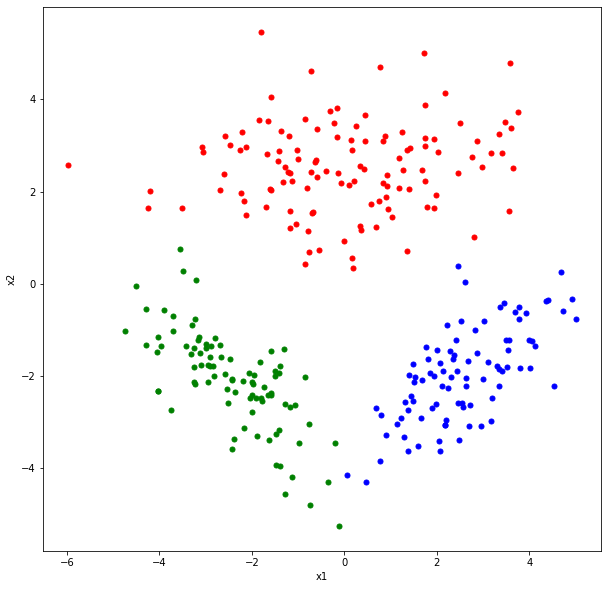

In [6]:
# plot data points generated
plt.figure(figsize = (10, 10))
plt.plot(points1[:,0], points1[:,1], "r.", markersize = 10)
plt.plot(points2[:,0], points2[:,1], "g.", markersize = 10)
plt.plot(points3[:,0], points3[:,1], "b.", markersize = 10)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


In [8]:
# get number of classes and number of samples
K = np.max(y_truth)
N = X.shape[0]

#calculate sample means and covariances for each class
sample_means = [np.mean(X[y_truth == (c + 1)],axis=0) for c in range(K)]

sample_covariances      =  [np.matmul((X[y_truth == (c + 1)] - sample_means[c]).T,
                                         X[y_truth == (c + 1)] - sample_means[c])
                                        /X[y_truth == (c + 1)].shape[0] for c in range(K)]
#calculate class priors for each class  
class_priors = [ y_truth[y_truth == (c+1)].shape[0]/y_truth.shape[0] for c in range(K)]
print("sample covariances \n", sample_covariances)
print("sample means\n", sample_means)
print("class priors\n", class_priors)


sample covariances 
 [array([[3.57775214, 0.22848747],
       [0.22848747, 0.93673779]]), array([[ 1.09084717, -0.80567934],
       [-0.80567934,  1.15431584]]), array([[1.17090774, 0.74028377],
       [0.74028377, 1.02927929]])]
sample means
 [array([0.04017264, 2.52907025]), array([-2.42962538, -2.0927848 ]), array([ 2.56758   , -1.96207192])]
class priors
 [0.4, 0.3, 0.3]


In [171]:
#simplified version of score function - derived formulas in the class are used
W =  [-1/2* np.linalg.inv(sample_covariances[c]) for c in range(K)]
w = [np.matmul(np.linalg.inv(sample_covariances[c]), sample_means[c]) for c in range(K)]
w0 = [-1/2*(np.matmul(np.matmul(sample_means[c].T,np.linalg.inv(sample_covariances[c])),
                           sample_means[c]) + np.log(np.linalg.det(sample_covariances[c])))
            + np.log(class_priors[c]) for c in range(K)]

                        
def score_func(x,c):
    score = np.matmul(np.matmul(x.T,W[c]),x) + np.matmul(w[c].T,x) + w0[c]
    return score

#prediction function for particular data point returns prediction class c
def pred(X):
    predictions =[[score_func(x,0), score_func(x,1),score_func(x,2)] for x in X]
    return np.argmax(predictions, axis=1)+1 #to be compatible with actual class numbers





In [172]:
# calculate confusion matrix
y_predicted = pred(X)
confusion_matrix = pd.crosstab(y_truth, y_predicted,rownames = ['y_pred'], colnames = ['y_truth'])
print(confusion_matrix)




y_truth    1   2   3
y_pred              
1        116   1   3
2          0  89   1
3          0   0  90


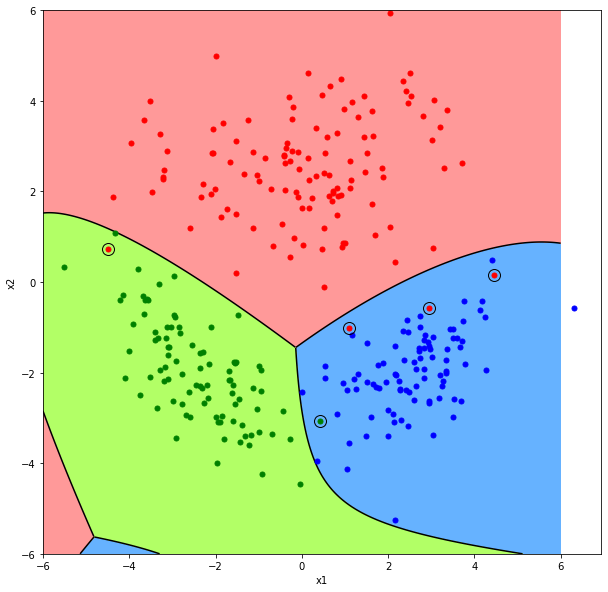

In [173]:
x1_interval = np.linspace(-6, +6, 1201)
x2_interval = np.linspace(-6, +6, 1201)
x1_grid, x2_grid = np.meshgrid(x1_interval, x2_interval)

discriminant_values = np.zeros((len(x1_interval), len(x2_interval), K))
for c in range(K):
    temp = W[c][0,0]*(x1_grid**2) + W[c][0,1]*x1_grid*x2_grid + W[c][1,0]*x1_grid*x2_grid + W[c][1,1]*(x2_grid**2)
    temp2 = w[c][0]*x1_grid + w[c][1]*x2_grid
    discriminant_values[:,:,c] = temp + temp2 + w0[c]
    

A = discriminant_values[:,:,0]
B = discriminant_values[:,:,1]
C = discriminant_values[:,:,2]
A[(A < B) & (A < C)] = np.nan
B[(B < A) & (B < C)] = np.nan
C[(C < A) & (C < B)] = np.nan
discriminant_values[:,:,0] = A
discriminant_values[:,:,1] = B
discriminant_values[:,:,2] = C

plt.figure(figsize = (10, 10))
plt.plot(X[y_truth == 1, 0], X[y_truth == 1, 1], "r.", markersize = 10)
plt.plot(X[y_truth == 2, 0], X[y_truth == 2, 1], "g.", markersize = 10)
plt.plot(X[y_truth == 3, 0], X[y_truth == 3, 1], "b.", markersize = 10)
plt.plot(X[y_predicted != y_truth, 0], X[y_predicted != y_truth, 1], "ko", markersize = 12, fillstyle = "none")
plt.contour(x1_grid, x2_grid, discriminant_values[:,:,0] - discriminant_values[:,:,1] ,levels = 0,colors="k")
plt.contour(x1_grid, x2_grid, discriminant_values[:,:,0] - discriminant_values[:,:,2] , levels = 0,colors="k")
plt.contour(x1_grid, x2_grid, discriminant_values[:,:,1] - discriminant_values[:,:,2],levels = 0,colors="k")


plt.contourf(x1_grid, x2_grid, discriminant_values[:,:,0] - discriminant_values[:,:,1] ,colors=["#B2FF66","#FF9999"],levels = 0)
plt.contourf(x1_grid, x2_grid, discriminant_values[:,:,0] - discriminant_values[:,:,2] , colors=["#66B2FF","#FF9999"],levels = 0)
plt.contourf(x1_grid, x2_grid, discriminant_values[:,:,1] - discriminant_values[:,:,2],colors=["#66B2FF","#B2FF66"] ,levels = 0)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()





